 BubbleSort Animation

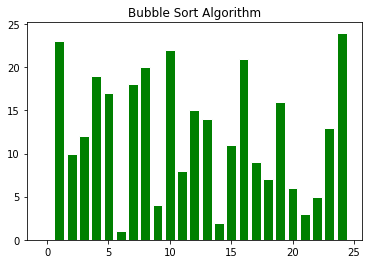

<function matplotlib.pyplot.show>

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import numpy as np

x_values = random.sample(range(25), 25)
y_values = np.arange(len(x_values))
plt.title('Bubble Sort Algorithm')
ax = plt.bar(y_values, x_values, align='center', color='g', edgecolor='w')

swap = True
numpasses = len(x_values) - 1
while numpasses > 0 and swap:
    swap = False
    # Adjust individual graph bars to proper height 
    for i in range(numpasses):
        plt.pause(0.1)
        if x_values[i] > x_values[i + 1]:
            swap = True
            ax[i].set_height(x_values[i + 1])
            ax[i + 1].set_height(x_values[i])
            x_values[i], x_values[i + 1] = x_values[i + 1], x_values[i]
    numpasses = numpasses-1

# Window will close without this
plt.show

BubbleSort function

In [23]:
import random


def bubblesort_short(a_list):
    swap = True
    numpasses = len(a_list) - 1
    while numpasses > 0 and swap:
        swap = False
        for i in range(numpasses):
            if a_list[i] > a_list[i + 1]:
                swap = True
                a_list[i], a_list[i+1] = a_list[i+1], a_list[i]
        numpasses = numpasses - 1
    return a_list


a_list = random.sample(range(10), 10)


print("Before sort\n" + str(a_list) + "\nAfter sort\n" + str(bubblesort_short(a_list)))

Before sort
[8, 9, 0, 6, 1, 2, 5, 7, 3, 4]
After sort
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


BubbleSort - Improved

In [24]:
import random

def bubble_sort(a_list):
    for passnum in range(len(a_list)-1, 0, -1):
        for i in range(passnum):
            if  a_list[i] > a_list[i + 1]:
                a_list[i], a_list[i+1] = a_list[i+1], a_list[i]
    return a_list


a_list = random.sample(range(10), 10)
print("Before sort\n" + str(a_list) + "\nAfter sort\n" + str(bubblesort_short(a_list)))

Before sort
[8, 5, 0, 3, 4, 1, 6, 7, 9, 2]
After sort
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Find most common integer in string

In [26]:
integer_list = [1,1,2,3,4,4,4,5,6,7,7,7,7,7,8,9,10]
integer_counter = {}

for number in integer_list:
    if number in integer_counter:
        integer_counter[number] += 1
    else:
        integer_counter[number] = 1

top_integers = sorted(integer_counter, key=integer_counter.get, reverse=True)


print(top_integers[:1])

[7]


Generic class for a deck of cards

In [40]:
import random
import itertools


class MyCards(object):

    def __init__(self):
        self.value = ('A', '2', '3', '4', '5', '6', '7',
                      '8', '9', '10', 'J', 'Q', 'K')
        self.rank = ('cdhs')
        self.deck = [(A + B) for A in self.value for B in self.rank]

    def join(self, iterable, sep=' '):
        """Join the items in iterable, mapping each to a string first."""
        return sep.join(map(str, iterable))

    def card_combinations(self, cards, n):
        return {self.join(combos)
                for combos in itertools.combinations(cards, n)}

    def pick_random_cards(self, counter):
        return random.sample(self.deck, abs(counter))

    def shuffle_cards(self, repeat=1):
        for x in range(0, abs(repeat)):
            random.shuffle(self.deck)

    def print_cards(self):
        print(self.deck)


cards = MyCards()
cards.shuffle_cards(1)
cards.print_cards()

print("Number of cards in deck: " + str(len(cards.deck)))

['6d', 'Kh', '6h', '4h', '4d', '8c', '2s', '3h', '8h', 'Kc', 'As', 'Jc', 'Js', 'Jh', '7s', 'Kd', '4s', 'Ah', '6c', '10h', '9d', '2c', 'Qs', '2h', '10d', '2d', 'Jd', '7d', '5d', '8d', '7h', '9s', '6s', '3d', '9c', '8s', 'Qh', 'Qc', '3c', '10c', '5s', '9h', '4c', '5c', '5h', '7c', 'Qd', 'Ad', '3s', '10s', 'Ks', 'Ac']
Number of cards in deck: 52


Fibonacci Sequence

In [93]:
import timeit

def fib(n, index = {0: 0, 1: 1}):
    if n < 2:
        return n

    if n not in index:
        index[n] = fib(n - 1, index) + fib(n - 2, index)
    return index[n]

timer = timeit.Timer(stmt='fib(100)', setup="from __main__ import fib")
print(timer.timeit(number=1))


7.97989996499382e-05


Fibonacci Sequence - Alternative to recursion

In [92]:
def fib(n):
    i = 0
    first=0
    last = 1

    while i < n:
        yield last
        first, last = last, first + last
        i += 1

timer = timeit.Timer(stmt='fib(90000000000000000)', setup="from __main__ import fib")
print(timer.timeit(number=1))   

2.0930001483066007e-06


Fibonacci Sequence - faster

In [98]:
import timeit

def fib(n, index = {0: 0, 1: 1}):
    if n < 2:
        return n

    if n not in index:
        index[n] = fib(n - 1, index) + fib(n - 2, index)
    return index[n]

timer = timeit.Timer(stmt='fib(100)', setup="from __main__ import fib")
print(timer.timeit(number=1))

0.00019152900040353416


Hash Table

In [103]:
class MyHashTable(object):
    def __init__(self, size):
        self.my_table = ['Empty'] * size
        self.size = size

    def djb2_hash(self, s):
        hash = 0
        for x in str(s):
            hash = ((hash * 33) ^ ord(x))
        return hash

    def insert(self, key, data):
        key = (self.djb2_hash(key)) % self.size
        self.my_table[(key)] = data

    def getitem(self, key):
        key = self.djb2_hash(key) % self.size
        return self.my_table[key]

    def delete(self, key):
            key = self.djb2_hash(key) % self.size
            self.my_table[(key)] = 'Empty'


hash_table = MyHashTable(100)
hash_table.insert('Ping', 'Pong')
print(hash_table.getitem('Ping'))
hash_table.delete('Ping')
print(hash_table.getitem('Ping'))

Pong
Empty


Multiplication Table

In [108]:
def multiplication_table():

    colheaders = ['1', '2', '3', '4', '5', '6',
                  '7', '8', '9', '10', '11', '12']

    rows = range(1, 13)
    cols = range(1, 13)

    for c in colheaders:
        print("\t" + "[" + c + "]", end="")

    for r in rows:
        print("\n" + "[" + str(r) + "]", end="")
        for c in cols:
            print ("\t" + str(r * c), end="")
        print ("\n", end=" ")


multiplication_table()

	[1]	[2]	[3]	[4]	[5]	[6]	[7]	[8]	[9]	[10]	[11]	[12]
[1]	1	2	3	4	5	6	7	8	9	10	11	12
 
[2]	2	4	6	8	10	12	14	16	18	20	22	24
 
[3]	3	6	9	12	15	18	21	24	27	30	33	36
 
[4]	4	8	12	16	20	24	28	32	36	40	44	48
 
[5]	5	10	15	20	25	30	35	40	45	50	55	60
 
[6]	6	12	18	24	30	36	42	48	54	60	66	72
 
[7]	7	14	21	28	35	42	49	56	63	70	77	84
 
[8]	8	16	24	32	40	48	56	64	72	80	88	96
 
[9]	9	18	27	36	45	54	63	72	81	90	99	108
 
[10]	10	20	30	40	50	60	70	80	90	100	110	120
 
[11]	11	22	33	44	55	66	77	88	99	110	121	132
 
[12]	12	24	36	48	60	72	84	96	108	120	132	144
 

Pascal's Triangle

In [109]:
def pascals_triangle():

    rows = range(0, 10)
    coef = 1

    for r in rows:
        for z in range(0, len(rows) - r):
            print ("", end=" ")
        for x in range(0, r + 1):
            if (x == 0 or r == 0):
                coef = 1
            else:
                coef = coef * (r - x + 1) / x
            print (int(coef), end=" ")
        print ("\n", end=" ")

pascals_triangle()


          1 
          1 1 
         1 2 1 
        1 3 3 1 
       1 4 6 4 1 
      1 5 10 10 5 1 
     1 6 15 20 15 6 1 
    1 7 21 35 35 21 7 1 
   1 8 28 56 70 56 28 8 1 
  1 9 36 84 126 126 84 36 9 1 
 

Profit Loss Analysis

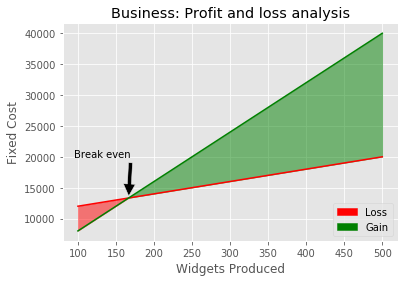

In [110]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(['ggplot'])
fig, (ax) = plt.subplots()

# Widgets Produced
x_values = [x for x in range(100, 600, 100)]
# C(x) = (variable costs) + (fixed costs) = 20x + 10000
y_values = [((20 * x) + 10000) for x in range(100, 600, 100)]
# R(x) = (widgets * price)  $80/widget
revenue = [(80 * x) for x in range(100, 600, 100)]

z1 = np.array(y_values)

ax.plot(x_values, y_values, color='r')
ax.fill_between(x_values, revenue, y_values,
                where=z1 < revenue, color='g', alpha=0.5, interpolate=True)

ax.plot(x_values, revenue, color='g')
ax.fill_between(x_values, revenue, y_values,
                where=z1 > revenue, color='r', alpha=0.5, interpolate=True)

# R(x) = C(x) (total reveue = total costs)
ax.annotate('Break even', xy=(166.66, 13333), xytext=(95, 20000),
            arrowprops=dict(facecolor='black', shrink=0.05),)

red_patch = mpatches.Patch(color='red', label='Loss')
green_patch = mpatches.Patch(color='green', label='Gain')

plt.legend(handles=[red_patch, green_patch], loc=4)
plt.title('Business: Profit and loss analysis')
plt.ylabel('Fixed Cost')
plt.xlabel('Widgets Produced')
plt.show()


Reverse a string

In [115]:
str1 = "Mr. Owl Ate My Metal Worm"


def reverse_string(string):
    return string[::-1]


print(reverse_string(str1))

mroW lateM yM etA lwO .rM


Print Squares

In [125]:
import random

def square_list(my_list):
    squared_list = [ i**2 for i in my_list ]
    print(squared_list)

numbers = list(range(0,25))
square_list(numbers)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576]


In [ ]:
Print temperature conversion chart

In [134]:
def temp_conversion_table():

    celsius = 0
    print("{0:^12} {1:^16}".format("Farenheit", "Celsius"))

    for fahr in range(0, 300, 20):
        celsius = 5 * (fahr - 32) / 9
        print("{0:^12}{1:^16}".format(fahr, celsius))


temp_conversion_table()

 Farenheit       Celsius     
     0      -17.77777777777778
     20     -6.666666666666667
     40     4.444444444444445
     60     15.555555555555555
     80     26.666666666666668
    100     37.77777777777778
    120     48.888888888888886
    140        60.0   
    160     71.11111111111111
    180     82.22222222222223
    200     93.33333333333333
    220     104.44444444444444
    240     115.55555555555556
    260     126.66666666666667
    280     137.77777777777777


In [ ]:
Transpose Matrix

In [136]:
def transpose_matrix(matrix):
    for i in range(len(matrix)):
        for j in range(i, len(matrix)):
            matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
    return matrix


print(transpose_matrix([[1, 0, 1], [1, 0, 1], [1, 0, 1]]))

[[1, 1, 1], [0, 0, 0], [1, 1, 1]]
